2.Img Aumentation
3.Create Model

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True
                                 )

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
xtrain=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/flowers')

Found 1602 images belonging to 5 classes.


In [11]:
xtest=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/flowers')

Found 1602 images belonging to 5 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

4.Add Layers

In [13]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

5.Compile the model

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.Fit the model

In [15]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [16]:
early_stopping=EarlyStopping(monitor='val_accuracy',
                             patience=5)
reduce_lr=ReduceLROnPlateau(monitot='val_accurancy',
                           patience=5,
                           factor=0,min_lr=0.00001)
callback=[reduce_lr,early_stopping]



In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10


InvalidArgumentError: ignored

7.Save the model

In [17]:
model.save('flowers.h5')

8.Test the model

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image 

In [18]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/flowers/rose/110472418_87b6a3aa98_m.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose','sunflower']
op[pred]

1/1 [==============================] - 0s 380ms/step


'daisy'

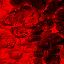

In [19]:
img

In [ ]:
img=image.load_img('',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose','sunflower']
op[pred]

1/1 [==============================] - 0s 380ms/step


'daisy'